### 01. Types of Errors

There are 2 types of errors we can make in Machine Learning

Underfitting : Is when we over simplify the problem (like killing a godzilla with a fly bat). this does not do well in the training set and its called error due to bias. 

Overfitting. :  Is when we over complicate the problem (Like killing a fly with a bazooka). this does well in the training set but it tends to memorize it instead of learning the characterstics of it. also called error due to varience.

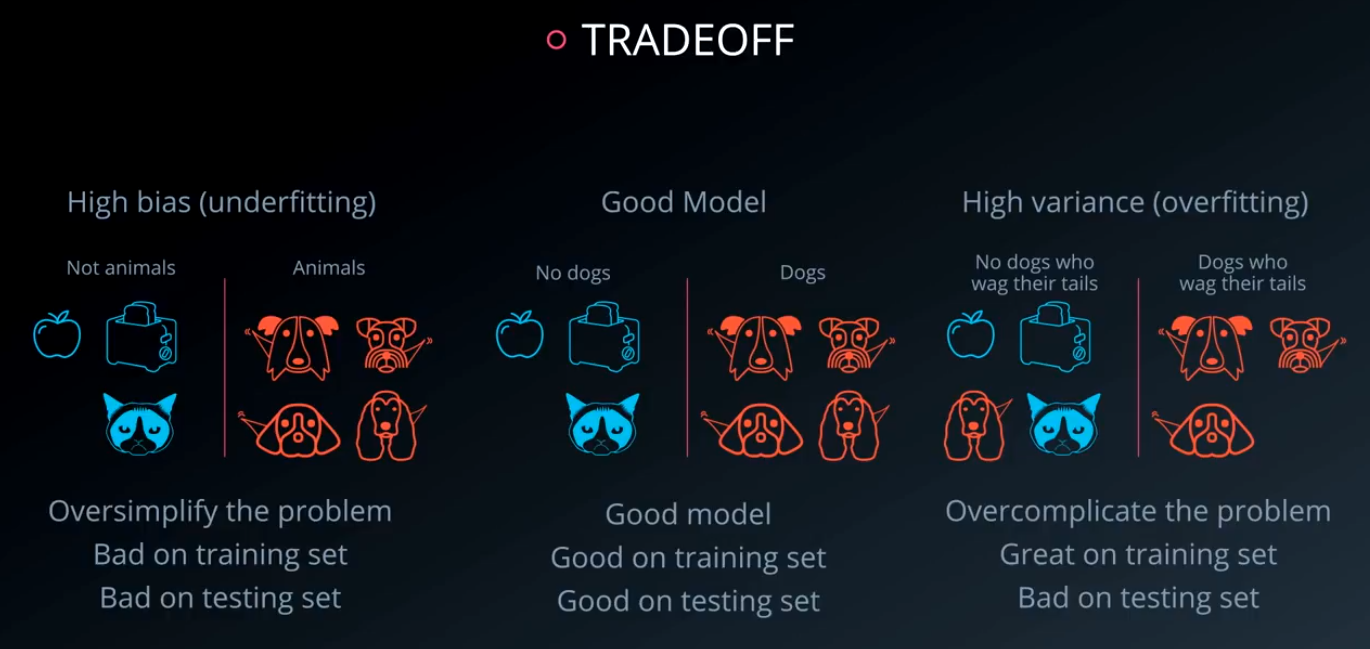

On the left its underfitting. to simplify we says animals and not animals and we mis classify as we have a cat on the left hence it will not work well on training set. 

on the right we have overfitting coz instead of just saying dogs we over compliacted it by saying dogs that wag their tail. so if there is a dog which doesnt wag its tail then it will be mis classified.

In the centre is an example of good model which says dogs and not dogs.

### 02. Model Complexity Graph

Error grpahs for underfitting, good and overfitting models.

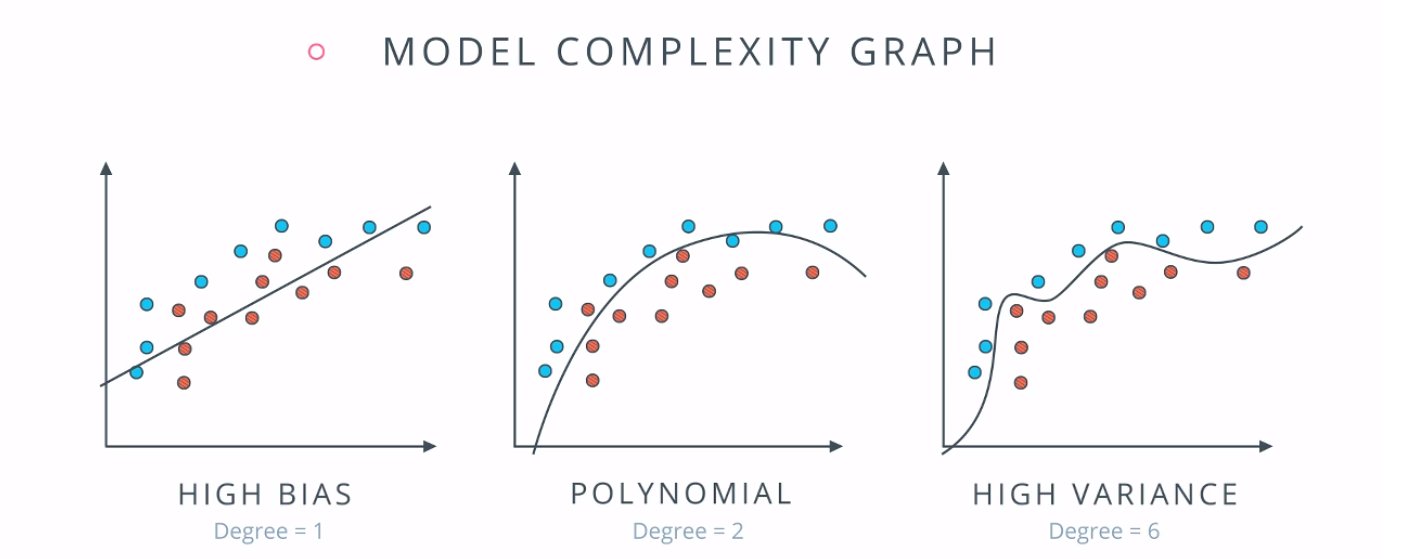

Split the data in to test and training sets and calculate the training and testing errors.

Training error: the no of values miscalssified in training set
testing error : no of values misclasified in testing set

First split the data set as show below

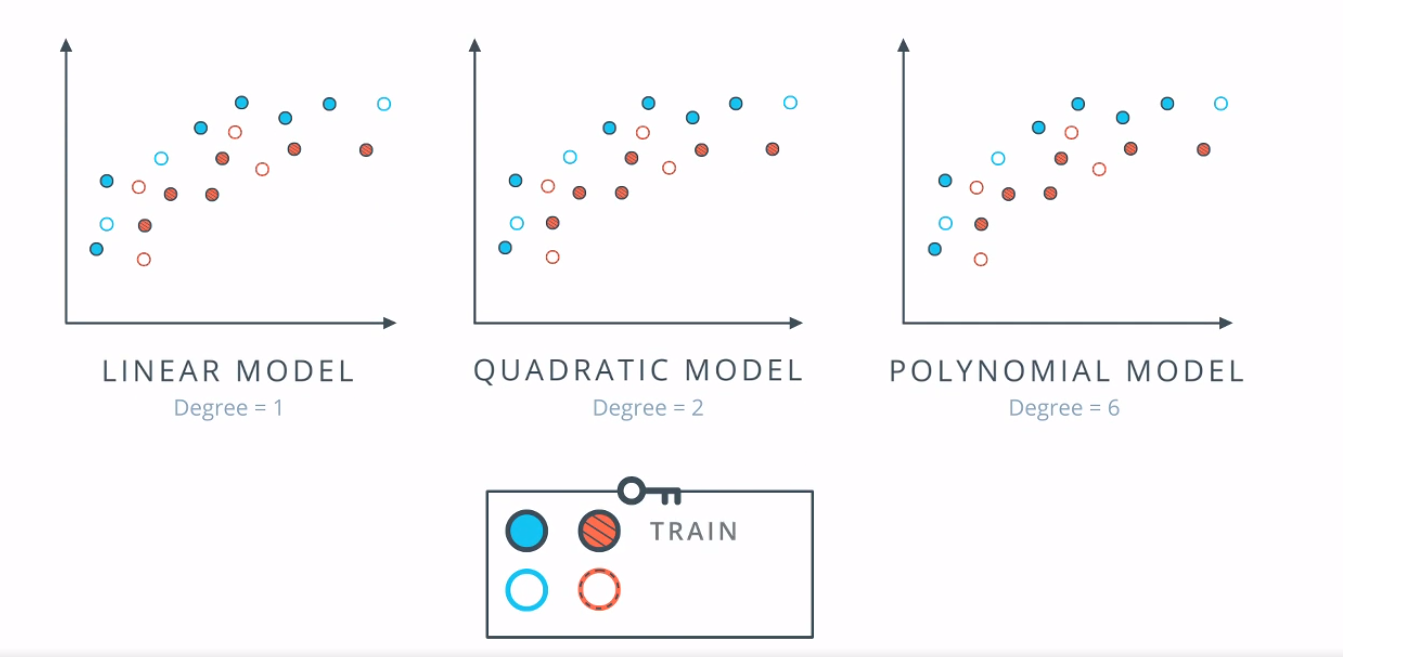

now lets calculate the train and test error for the first case and plot it

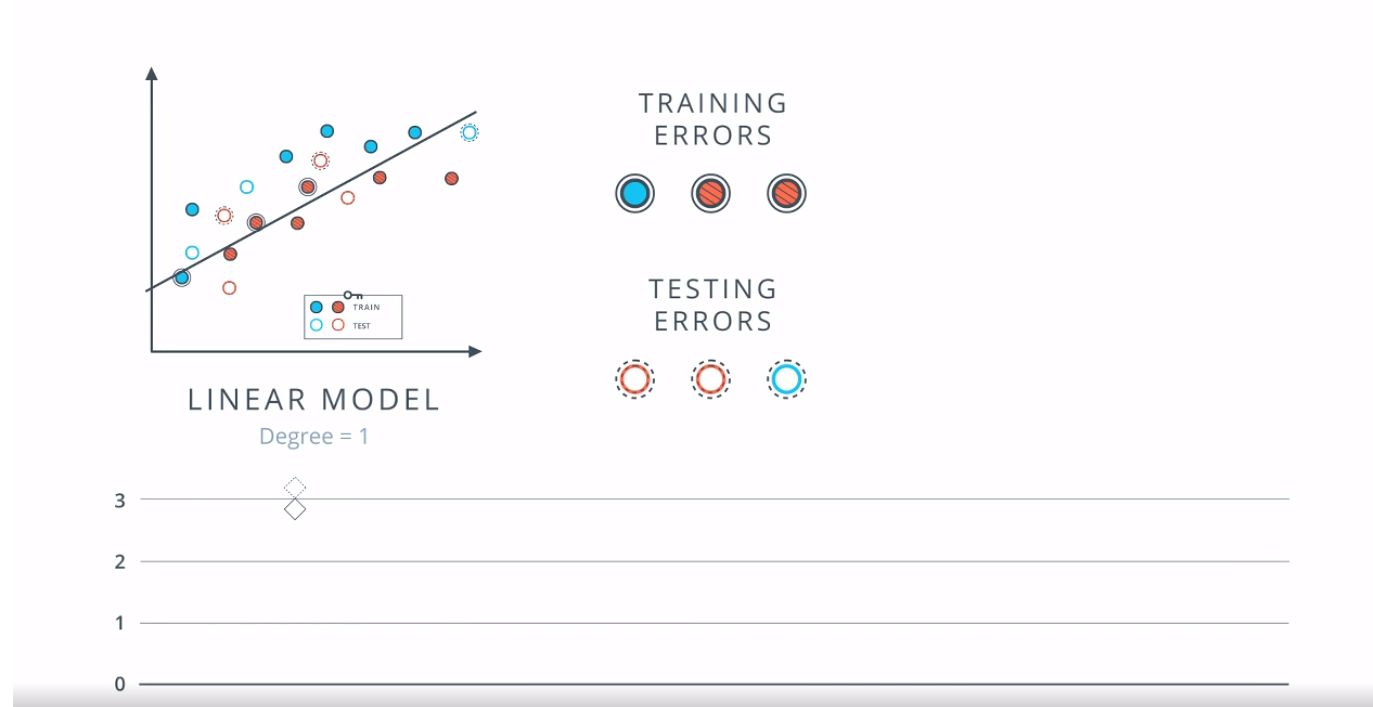

and we have to do the same for quadratic and polynomial model.

quadratic : training error 1 and testing error 1

polynomial : training error 0 and testing error 1

### 03. Cross Validation

So in section two we calculate training and testing error and the 4 model we used on the same data is regression and polynomial degree 2 ,3 and 4

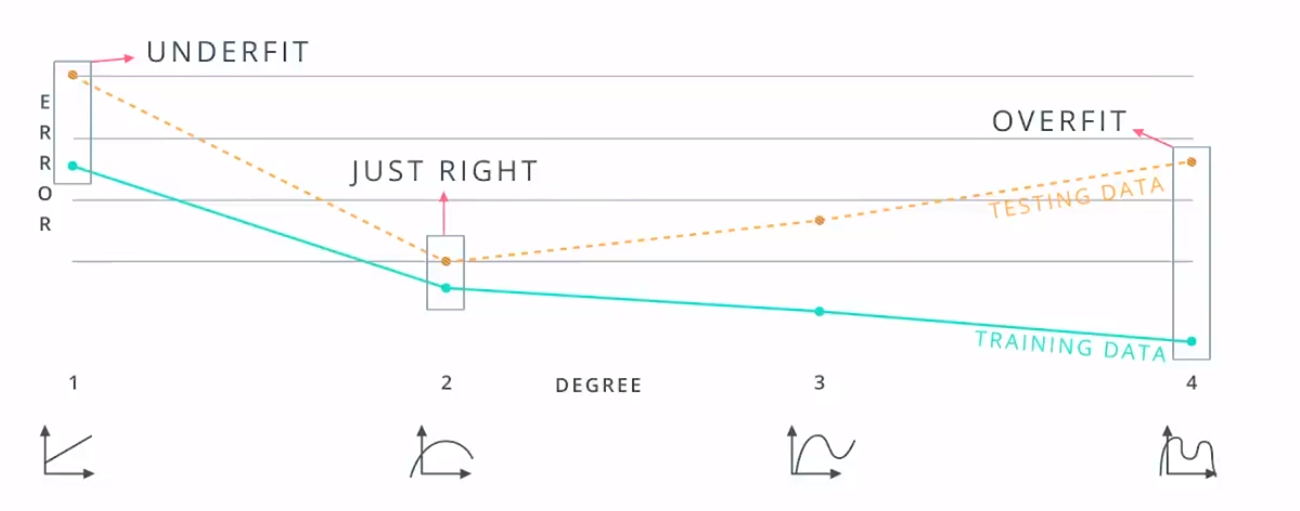

when we used regression the model was underfit and when we used polynomial degree model was overfit i.e did well on training set but not on testing set. 

#### There is problem which the above evaluation. We are not suposse to use the testing data to evalulate our model.

How do we make a good decision of our model without using the testing set. The solution is cross validation. here we will be breaking our testing data set even more. 

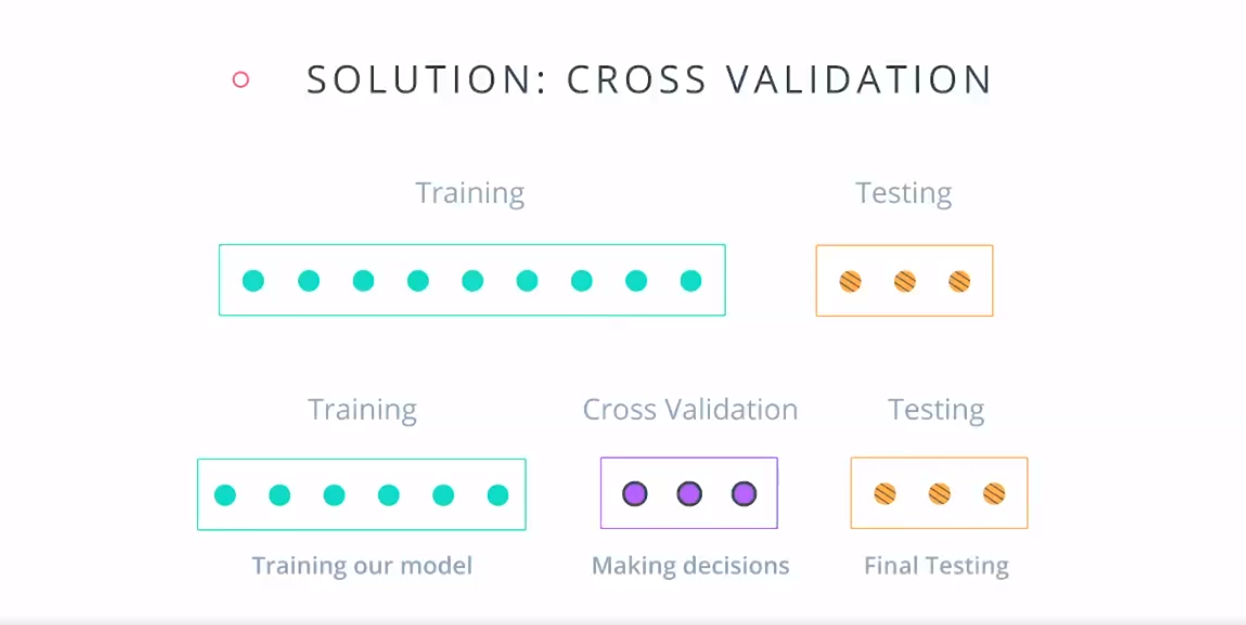

using cross validation we will be making descision about model and degree of polynomial

so instead of using the testing error we used the cros validation error. Author says underfitting is like going to an exam un prepared so u will not do well. 

overfitting is like going to exam memorizing everything instead of understanding material . so you will do well if the same questions come in test. 

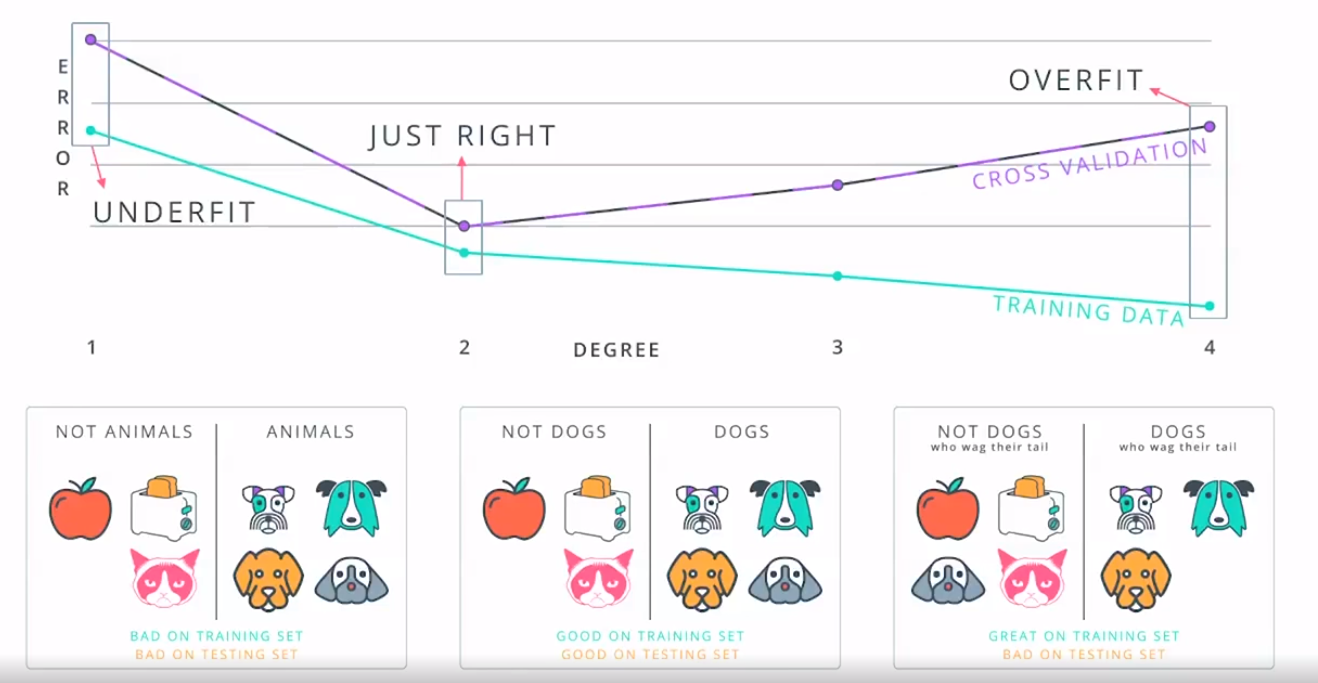

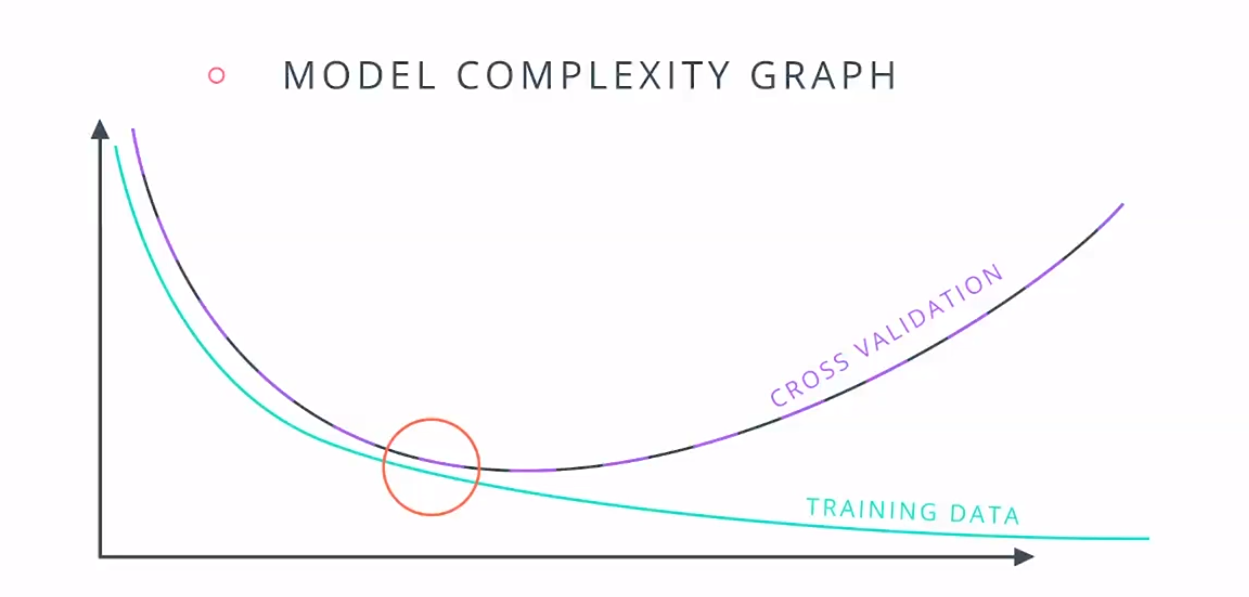

underfit on the left and overfit on the right and circle marked as good model.

### 04. K-Fold Cross Validation

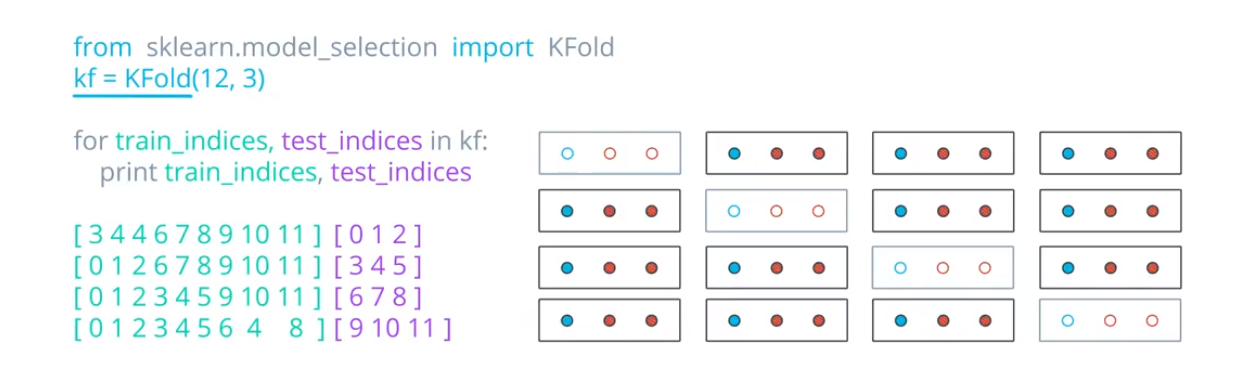

here 12 is the dataset size and 3 is test set size

Its also good to randamize our data to remove the bias. even this can be achieved using shuffle =True

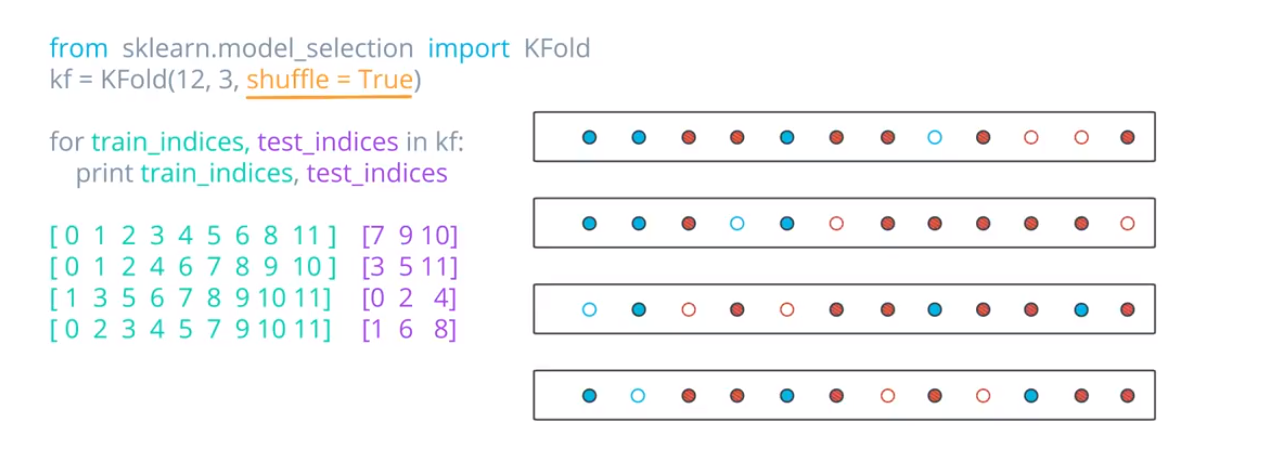

IN both cases we average the result to get one value

### 05. Learning Curves

Using crossvalidation on testing and training set we have different curves for overfitting, underfitting and good models

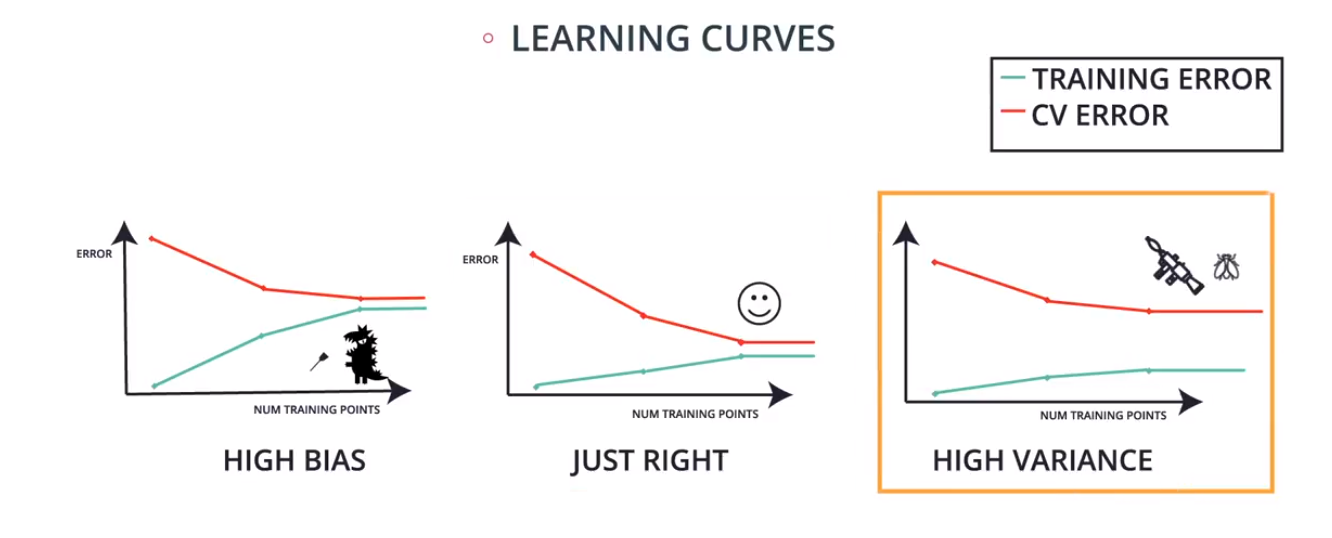

the testing is done using 4,8 and 12 points

### 06. Detecting Overfitting and Underfitting with Learning Curves

For this quiz, we'll be using three models to train the circular dataset below.

A Decision Tree model,

a Logistic Regression model, and

a Support Vector Machine model.

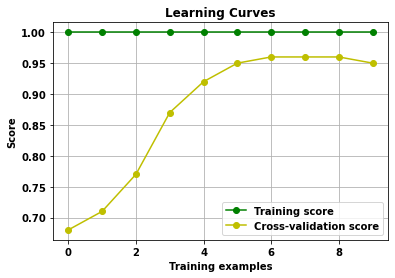

In [9]:
# Import, read, and split data
import  utils as ut
import pandas as pd
data = pd.read_csv('./Data/data.csv')
import numpy as np
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])



# Fix random seed
np.random.seed(55)

### Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# TODO: Uncomment one of the three classifiers, and hit "Test Run"
# to see the learning curve. Use these to answer the quiz below.

### Logistic Regression
#estimator = LogisticRegression()
X2, y2 = ut.randomize(X, y)



### Decision Tree
estimator = GradientBoostingClassifier()

### Support Vector Machine
#estimator = SVC(kernel='rbf', gamma=1000)

ut.draw_learning_curves(X2, y2, estimator, 10)

# The Logistic Regression model has a low training and testing score.
# The Decision Tree model has a high training and testing score.
# The Support Vector Machine model has a high training score, and a low testing score.


#  SVC is overift, Logistic Regression is underfit , decision tree is good fit

### 07. Solution: Detecting Overfitting and Underfitting

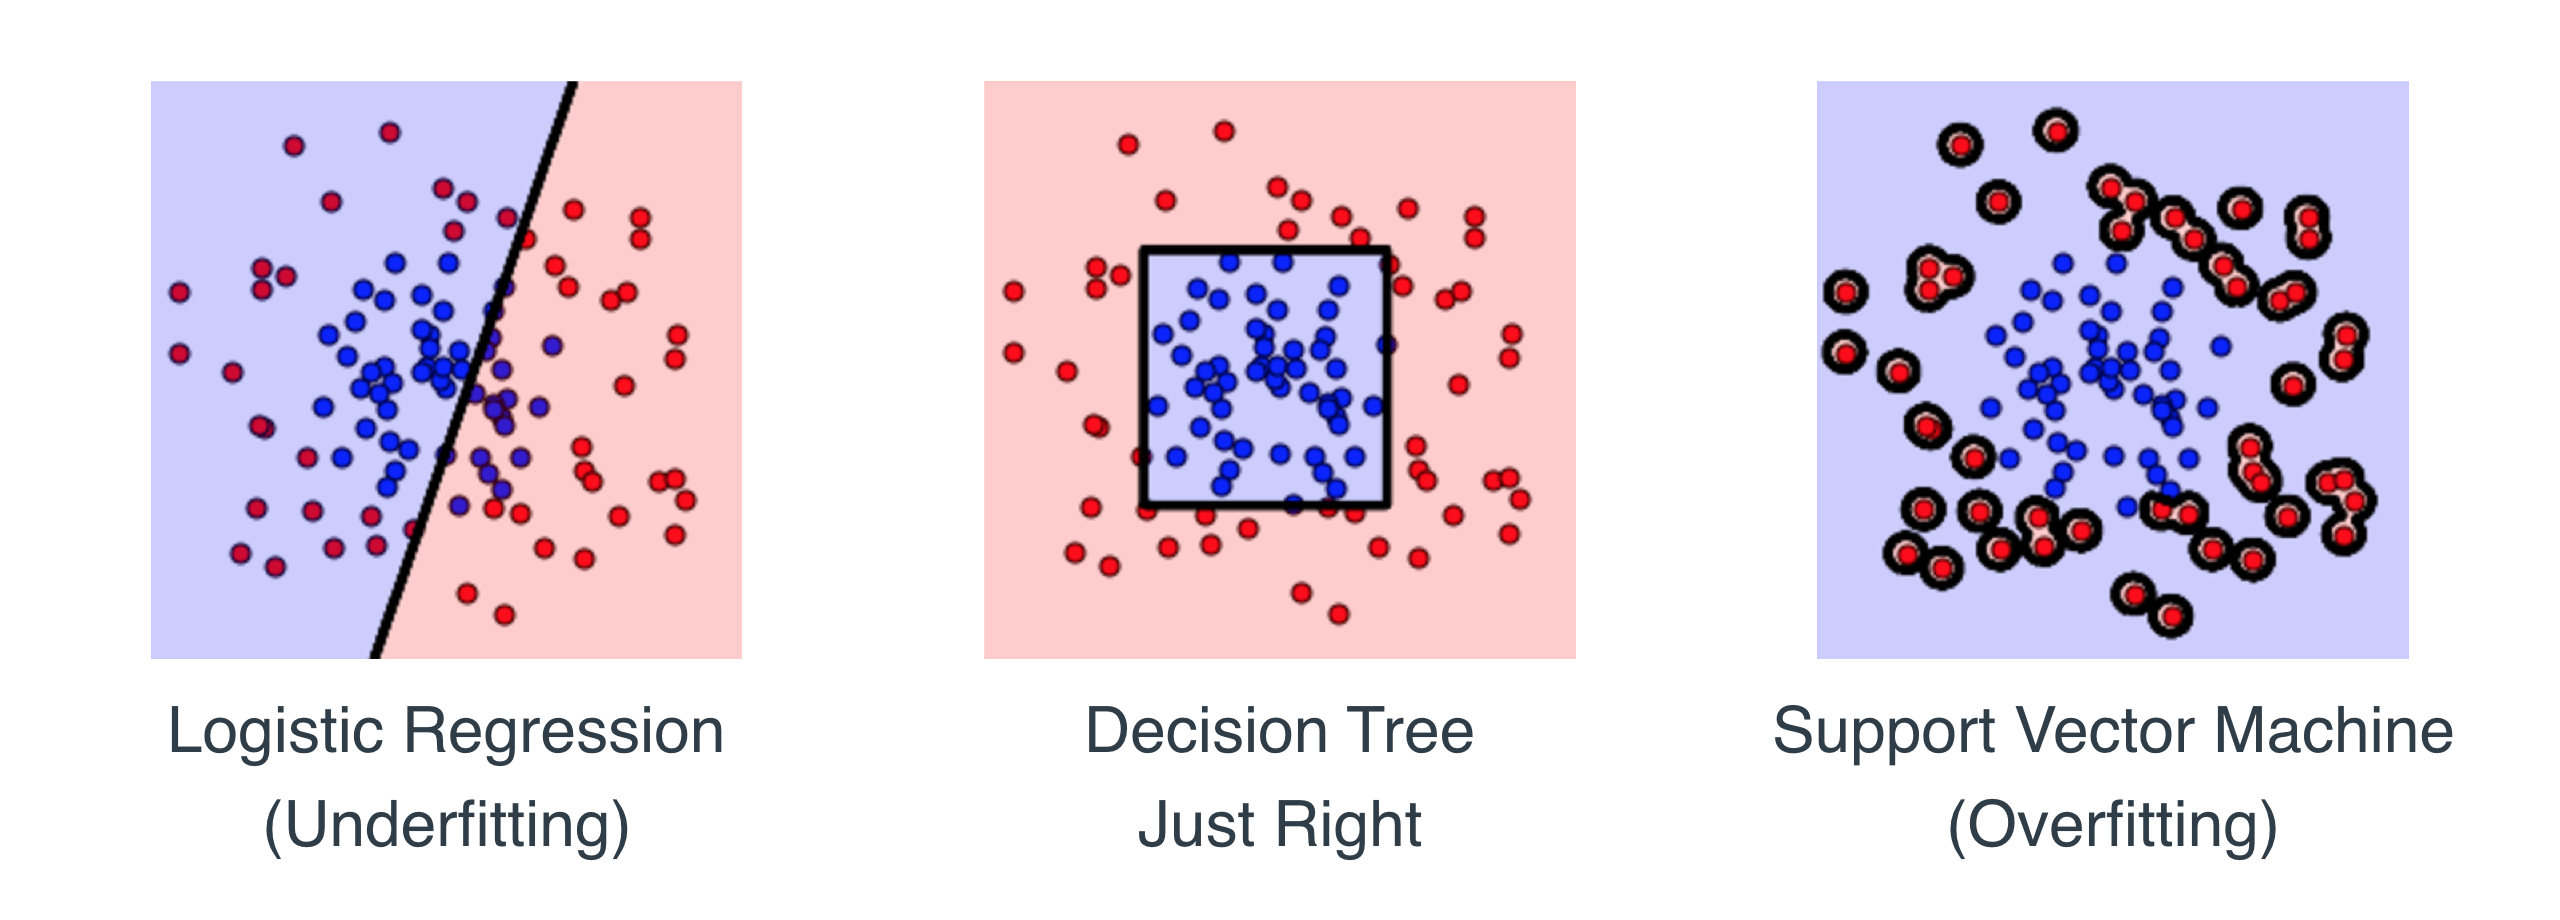

When we look at the models above, does it make sense that the first one underfits, the second one is right, and the third one overfits? It does, right? We can see that the data is correctly bounded by a circle, or a square. What our models do, is the following:

The Logistic Regression model uses a line, which is too simplistic. It doesn't do very well on the training set. Thus, it underfits.
The Decision Tree model uses a square, which is a pretty good fit, and generalizes well. Thus, this model is good.
The Support Vector Machine model actually draws a tiny circle around each point. This is clearly just memorizing the training set, and won't generalize well. Thus, it overfits.

### 08. Grid Search

summary of what we do in Machine leraning : 

1. First we train a bunch of models
2. We choose the best model using cross validation data.
3. finally we test it with the testing data to check if our model is good

#### Here is an example of training Logistic regression model
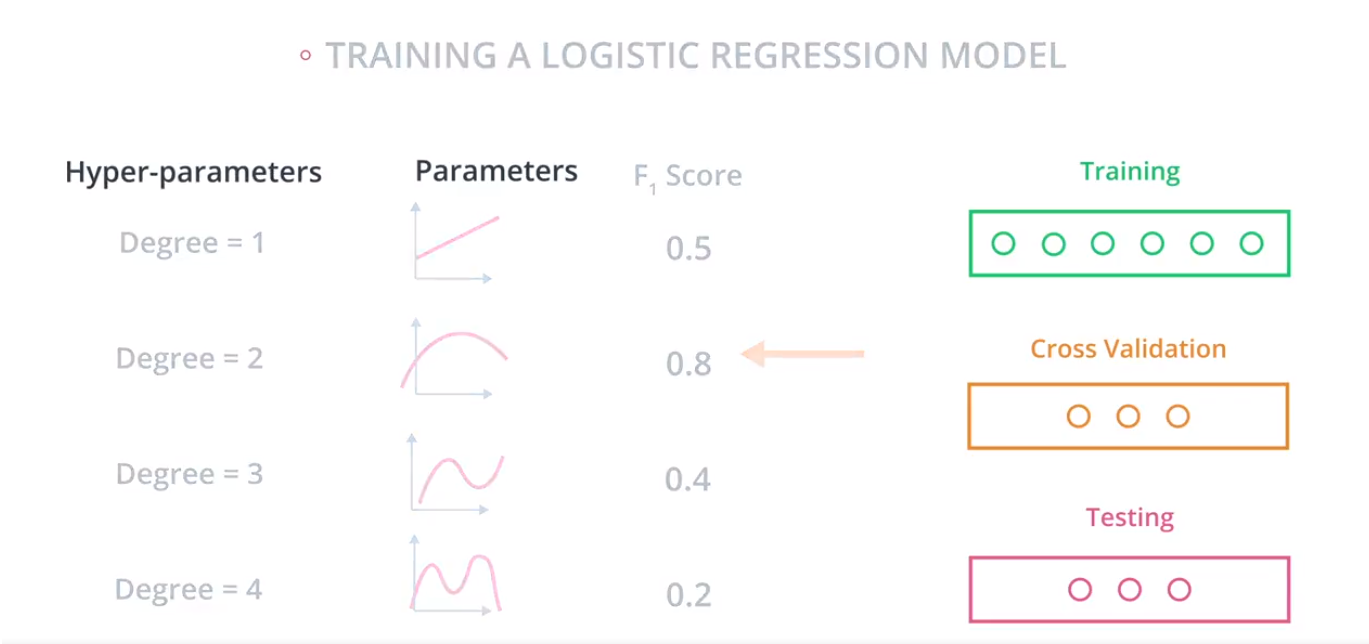

So we train 4 models with degree 1 ,2 ,3 and 4

Note : Here degree 1 is line, degree 2 is curve and so on

1. first we train the data with the testing datset to find the slope and the coefficients of the polynomial
2. second we perform cross validation to find the F1 score of all these models
3. then we pick the model with the highest F1 score and we test it with our testing set to check if the model is good.

the parameters of the models is the coeffients of the polynomial and the degree of the polynomial is like the metaparameter
also called hyperparameter

#### example of training a decision tree

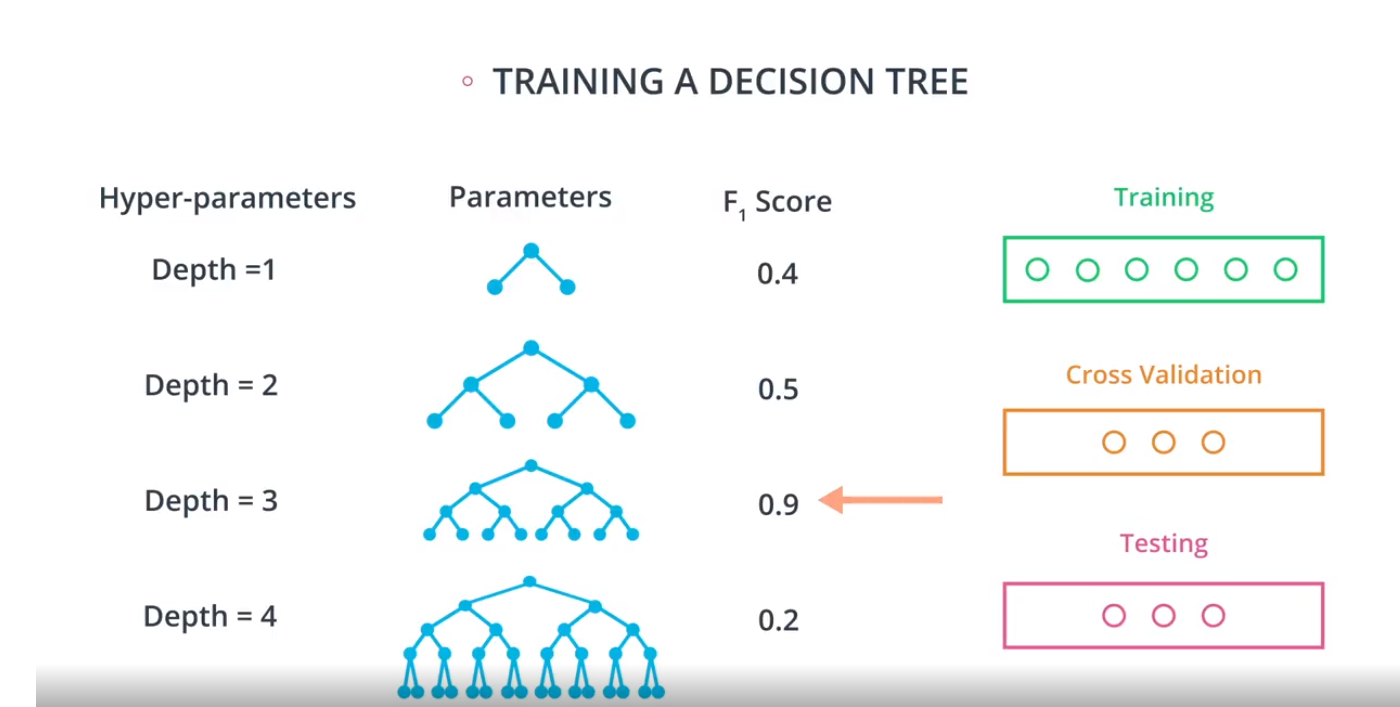

#### what if we have more than one hyperparameter like in SVM

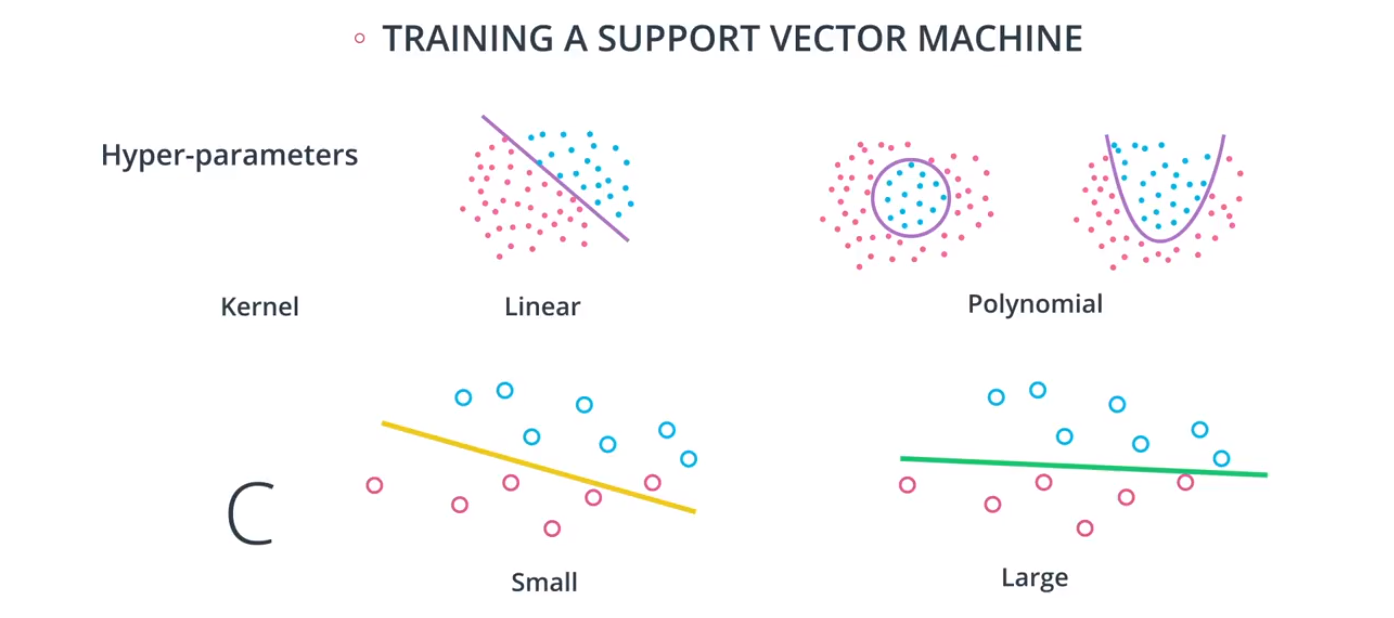

so in case if we have more than one hyperparameter then how do we find the best combination of kernal and gamma (c). 
the answer is grid search . so in grid search it says make a table with all possibilities and choose the best one.  

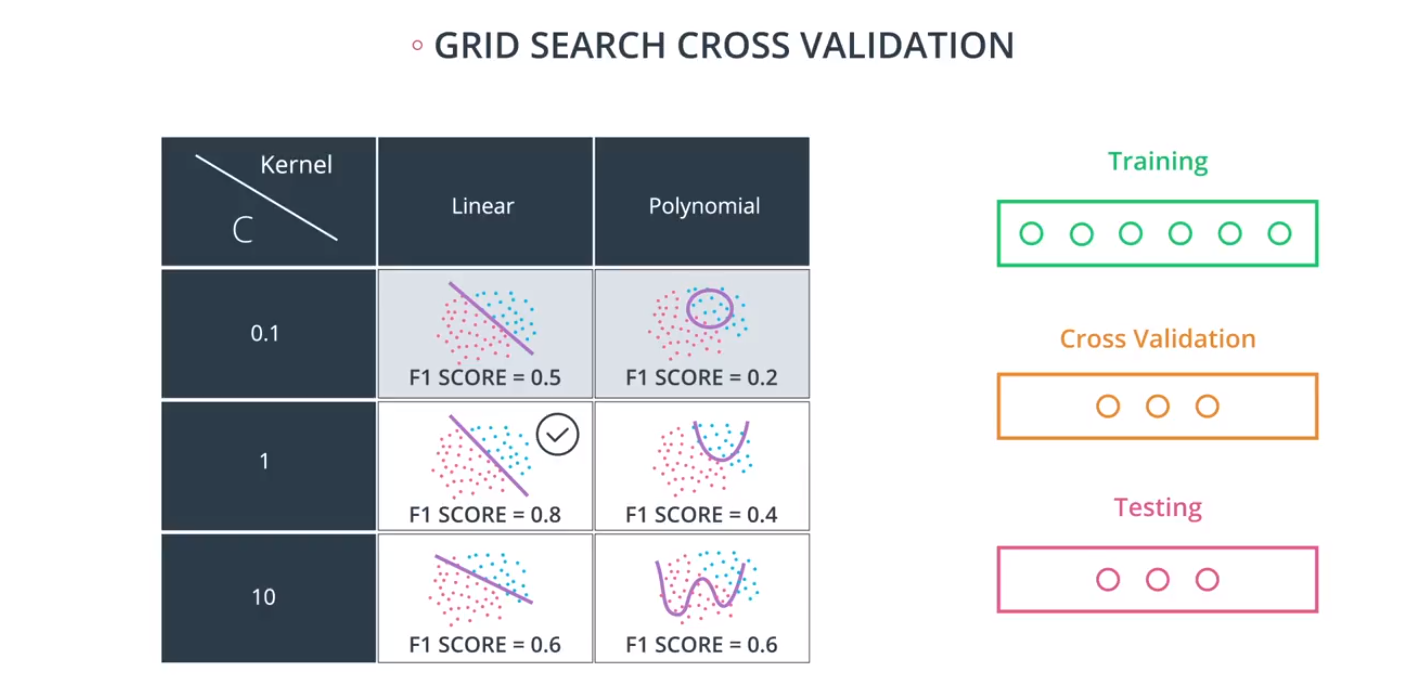

1. So first we train the model with testing set and find the coeffients
2. using cross validation dataset we find the F1 score
3. choose the model with best F1 score and test it with testing set to check if the model is good.

### 09. Grid Search in sklearn

Grid Search in sklearn is very simple. We'll illustrate it with an example. Let's say we'd like to train a support vector machine, and we'd like to decide between the following parameters:

kernel: poly or rbf.

C: 0.1, 1, or 10.

In [13]:
# 1. Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# 2. Select the parameters:
# Here we pick what are the parameters we want to choose from, and form a dictionary. 
# In this dictionary, the keys will be the names of the parameters, and the values will be the lists of possible values for each parameter.
parameters = {'kernel':['poly', 'rbf'],'C':[0.1, 1, 10]}

# instanstiate the model
clf = SVC()

# 3. Create a scorer.
# We need to decide what metric we'll use to score each of the candidate models. In here, we'll use F1 Score.

from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
scorer = make_scorer(f1_score)

# 4. Create a GridSearch Object with the parameters, and the scorer. Use this object to fit the data.
# Create the object.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)


# Fit the data
grid_fit = grid_obj.fit(X, y)


# 5. Get the best estimator.
best_clf = grid_fit.best_estimator_

# Now you can use this estimator best_clf to make the predictions.
best_clf

SVC(C=10)

### 10. Grid Search Lab

